In [541]:
import seaborn as sns
import pandas as pd
from statsmodels.stats.weightstats import ztest
import random
from math import sqrt
import scipy
import numpy as np
import matplotlib.pyplot as plt

H0 = Means of group1 and group 2 are the same <br>
H1 = Means of group1 and group 2 are different <br>
We are using a two-tailed test since extreme values in either tail would suggest that the means are different.

In [542]:
r =[]
for i in range(200):
    r.append([random.randint(0,1), random.randint(0,190), random.randint(0, 200)])
df1 = pd.DataFrame(r)
df1.columns= ['Grupa', 'Zmienna1', 'Zmienna2']

In [543]:
Z1_mean = df1['Zmienna1'].mean()
Z1_stddev = df1['Zmienna1'].std()
Z2_mean = df1['Zmienna2'].mean()
Z2_stddev = df1['Zmienna2'].std()
print(f'Zmienna1 średnia: {Z1_mean}, odch std {Z1_stddev}') 
print(f'Zmienna2 średnia: {Z2_mean}, odch std {Z2_stddev}')

Zmienna1 średnia: 92.95, odch std 55.429048313902385
Zmienna2 średnia: 102.465, odch std 60.039172932612594


In [544]:
Z_score = (Z1_mean-Z2_mean)/(sqrt((Z1_stddev**2/df1['Zmienna1'].count())+(Z2_stddev**2/df1['Zmienna2'].count())))
#print(f'Z-score is {Z_score}, or {Z_score} standard deviations away from the mean (+ above, - below)')
p = scipy.stats.norm.sf(abs(Z_score))*2
z_test = ztest(df1['Zmienna1'], df1['Zmienna2'], value = 0)
#print(f'Z-score: {z_test[0]}, p: {z_test[1]}')

In [545]:
confidence_interval = 5
if round(p, 2) == round(z_test[1], 2) and round(Z_score, 2) == round(z_test[0],2):
    print(f'Z-score: {z_test[0]}, p: {z_test[1]}, confidence interval: {confidence_interval}%')
    if p > confidence_interval/100:
        print("Can't reject the NULL hypothesis")
    else:
        print('There are grounds to reject the NULL hypothesis')
else:
    print('Different results')

Z-score: -1.6467605175239322, p: 0.09960727969411325, confidence interval: 5%
Can't reject the NULL hypothesis


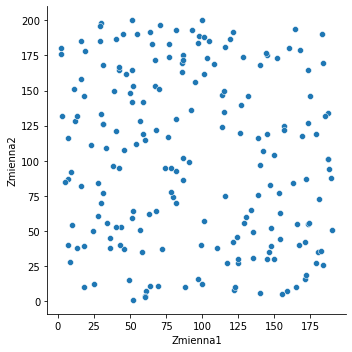

In [546]:
ax = sns.relplot(x='Zmienna1', y='Zmienna2', data = df1)

In [547]:
max_val = max(df1['Zmienna1'].max(), df1['Zmienna2'].max())
base_df = pd.DataFrame(range(max_val))
base_df.columns = ['Number']

df_z1 = pd.DataFrame(df1.groupby('Zmienna1')['Zmienna1'].count())
df_z1.columns = ['Number']
df_z1.reset_index(inplace=True)
df_z1.columns = ['Number', 'Count1']
df_z1

df_z2 = pd.DataFrame(df1.groupby('Zmienna2')['Zmienna2'].count())
df_z2.columns = ['Number']
df_z2.reset_index(inplace=True)
df_z2.columns = ['Number', 'Count2']
df_z2

df_fin = base_df.merge(df_z1, on ='Number', how='left').merge(df_z2, on ='Number', how='left')
df_fin = df_fin.replace(np.NaN, 0)

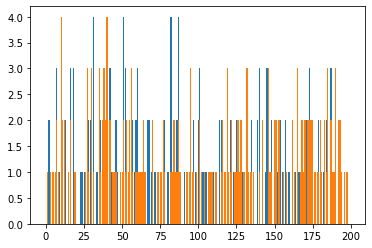

In [548]:
x1 = df_fin['Number']
y1 = df_fin['Count1']
y2 = df_fin['Count2']

fig, ax = plt.subplots()

ax.bar(x1, y1, linewidth=2.0)
ax.bar(x1, y2, linewidth=2.0)

plt.show()

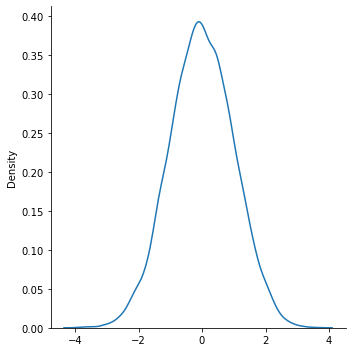

In [447]:
normal_dist = np.random.normal(size=10000)
sns.displot(normal_dist, kind='kde')